In [1]:
!pip install ta
!pip install yfinance

  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=446c3292169b8e1868f52e6de55ac46eb6802ccb06ad18bdf8ef379452cb8a10
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta
     |████████████████████████████████| 6.4 MB 4.3 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium=

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator
from numpy.ma.core import size

In [3]:
btc = yf.Ticker("BTC-USD")
hist = btc.history(period="2y", actions=False)
df = pd.DataFrame(hist)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-19,9727.063477,9836.047852,9539.624023,9729.038086,39254288955
2020-05-20,9725.329102,9804.793945,9447.201172,9522.981445,36546239703
2020-05-21,9522.740234,9555.242188,8869.930664,9081.761719,39326160532
2020-05-22,9080.334961,9232.936523,9008.638672,9182.577148,29810773699
2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,27727866812
...,...,...,...,...,...
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,25835372065
2022-05-16,31304.375000,31305.341797,29251.884766,29862.917969,32613897286
2022-05-17,29862.408203,30694.490234,29570.302734,30425.857422,29101473475


In [4]:
adxI = ADXIndicator(df['High'], df['Low'], df['Close'],14,False)
df['+DM'] = adxI.adx_pos()
df['-DM'] = adxI.adx_neg()
df['adx'] = adxI.adx()
df.tail()

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Volume,+DM,-DM,adx
Date,,,,,,,,
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,25835372065,12.258263,33.536878,41.838530
2022-05-16,31304.375000,31305.341797,29251.884766,29862.917969,32613897286,11.370474,32.080933,42.254599
2022-05-17,29862.408203,30694.490234,29570.302734,30425.857422,29101473475,10.904847,30.767201,42.640949
2022-05-18,30424.478516,30618.716797,28720.271484,28720.271484,31285268319,10.149012,31.738117,43.276677
2022-05-19,28781.103516,29003.515625,28708.955078,28785.673828,31629174784,10.032816,31.418732,43.870669


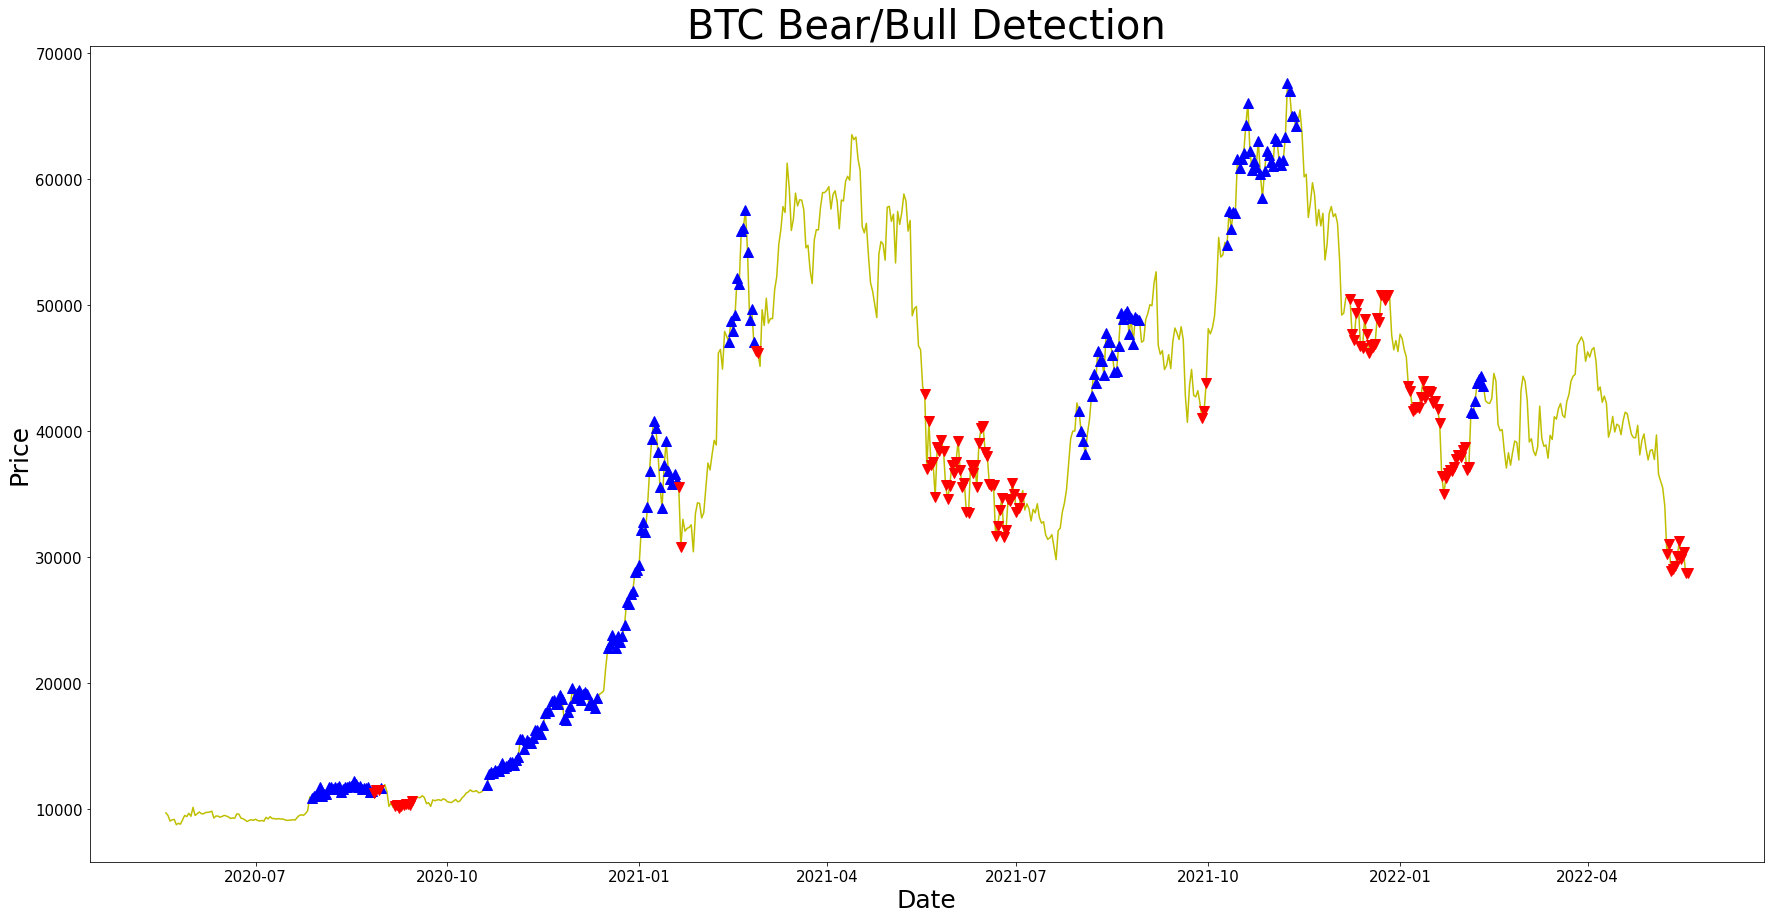

In [5]:
plt.figure(figsize=(30,15))
plt.plot(df['Close'], color = 'y')
for i in df.index:
  if (df['+DM'][i] > df['-DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, y, '^', markersize=10, color='b', label = 'Bull Run')
for i in df.index:
  if (df['-DM'][i] > df['+DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, y, 'v', markersize=10, color='r', label = 'Bear Run')
plt.title('BTC Bear/Bull Detection', fontdict={'fontsize': 40})
plt.xlabel('Date', fontdict={'fontsize': 25})
plt.ylabel('Price', fontdict={'fontsize': 25})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

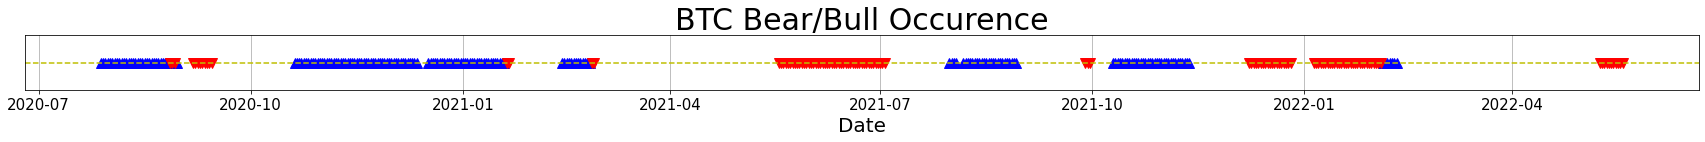

In [6]:
plt.figure(figsize=(30,1))
for i in df.index:
  if (df['+DM'][i] > df['-DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, 0, '^', markersize=10, color='b', label = 'Bull Run')
for i in df.index:
  if (df['-DM'][i] > df['+DM'][i]) & (df['adx'][i] > 30):
    x = i
    y = df['Close'][i]
    plt.plot(x, 0, 'v', markersize=10, color='r', label = 'Bear Run')
plt.title('BTC Bear/Bull Occurence', fontdict={'fontsize': 30})
plt.xlabel('Date', fontdict={'fontsize': 20})
plt.xticks(size=15)
plt.gca().set_yticks([])
plt.yticks([])
ax = plt.gca()
ax.set_yticks([])
ax.axhline(linestyle='--', color='y')
plt.grid()
plt.show()
